The first test for measure OTOC in a quantum circuit with 2 qubits.

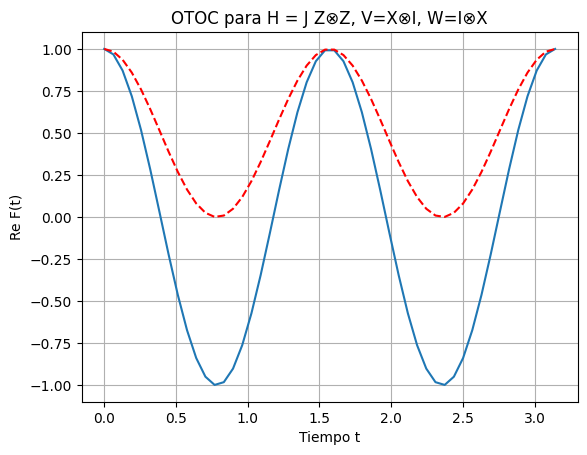

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qiskit.quantum_info import Pauli, SparsePauliOp, Operator, Statevector
from qiskit.quantum_info import Operator, Statevector

# Hamiltoniano H = J Z⊗Z
J = 1.0
H_op = SparsePauliOp(["ZZ"], coeffs=[J])
H = H_op.to_matrix()

# Operador de evolución U(t) = exp(-i H t)
def U(t):
    return Operator(expm(-1j * H * t))

# Operadores V = X⊗I, W = I⊗X
V = Operator(Pauli("XI"))
W = Operator(Pauli("IX"))

# Estado inicial |00⟩
psi0 = Statevector.from_label('00')

# Cálculo del OTOC
def otoc(t):
    Ut = U(t)
    Wt = Ut.adjoint().compose(W).compose(Ut)
    psi = psi0.evolve(V)      # aplica V |ψ₀⟩
    psi = psi.evolve(Wt)      # aplica W(t)
    psi = psi.evolve(V)       # aplica V
    psi = psi.evolve(Wt)      # aplica W(t)
    return np.vdot(psi0.data, psi.data).real  # ⟨ψ₀| ... |ψ₀⟩

# Barrido de tiempos y gráfico
t_list = np.linspace(0, np.pi, 50)
F_real = [otoc(t) for t in t_list]

plt.plot(t_list, F_real)
plt.plot(t_list, np.cos(2 * J * t_list)**2, 'r--', label='cos^2(2Jt)')
plt.xlabel('Tiempo t')
plt.ylabel('Re F(t)')
plt.title('OTOC para H = J Z⊗Z, V=X⊗I, W=I⊗X')
plt.grid(True)
plt.show()


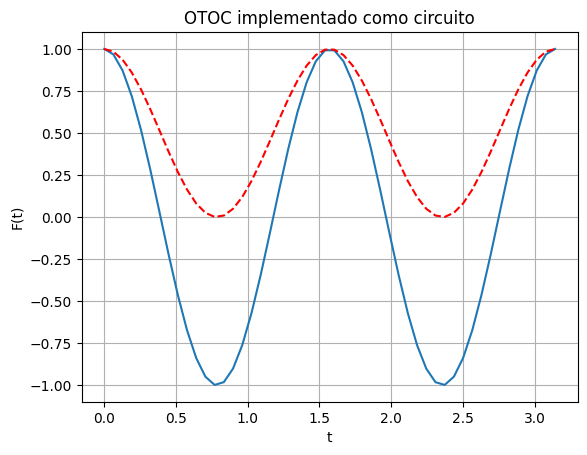

In [72]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZZGate
import numpy as np
import matplotlib.pyplot as plt

J = 1.0

def otoc_circuit(t):
    qc = QuantumCircuit(2)
    # V = X on qubit 0
    qc.x(0)
    # U(t)
    qc.append(RZZGate(2 * J * t), [0, 1])
    # W = X on qubit 1
    qc.x(1)
    # U†(t)
    qc.append(RZZGate(-2 * J * t), [0, 1])
    # V = X on qubit 0
    qc.x(0)
    # U(t)
    qc.append(RZZGate(2 * J * t), [0, 1])
    # W = X on qubit 1
    qc.x(1)
    # U†(t)
    qc.append(RZZGate(-2 * J * t), [0, 1])
    
    return qc

def otoc_value(t):
    qc = otoc_circuit(t)
    final_state = Statevector(qc)
    psi0 = Statevector.from_label('00')
    return np.vdot(psi0.data, final_state.data).real

t_vals = np.linspace(0, np.pi, 50)
F_vals = [otoc_value(t) for t in t_vals]

plt.plot(t_vals, F_vals)
plt.plot(t_list, np.cos(2 * J * t_list)**2, 'r--', label='cos^2(2Jt)')
plt.xlabel('t')
plt.ylabel('F(t)')
plt.title('OTOC implementado como circuito')
plt.grid()
plt.show()
